# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Importing the Libraries**

In [1]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

#deep learning libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:

path = '/Users/le/Desktop/facial emotion recognition/Facial_emotion_images (1).zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:**

Happy faces clearly stand out with big smiles. You can see the mouth corners pulling up and sometimes the teeth showing. The eyes also tend to squint a bit, which adds to the cheerful look. Some people even get those little wrinkles near their eyes. What makes this emotion easy to spot is mainly the smile itself. It’s a strong indicator that someone’s happy and helps separate it from emotions like sad or neutral where the mouth doesn’t move as much.

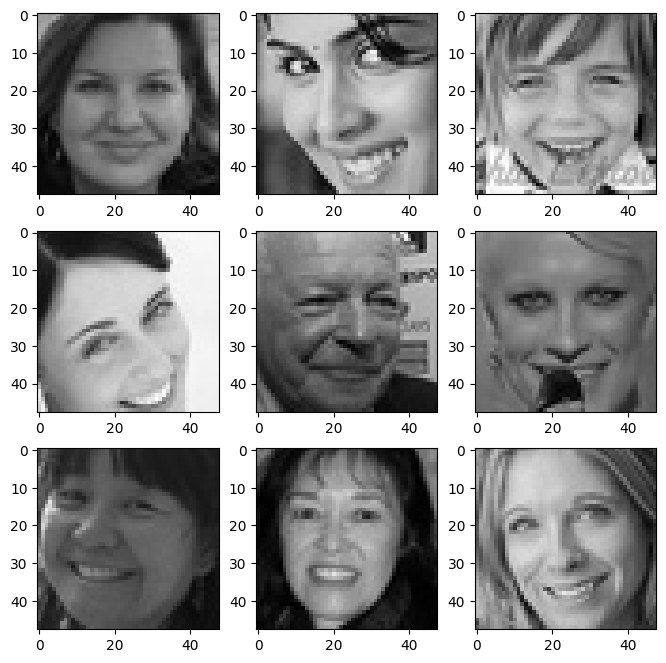

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Sad**

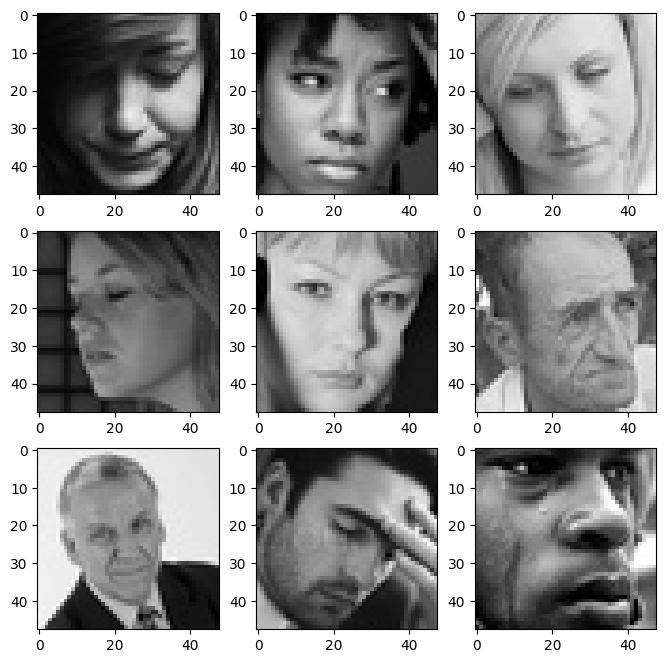

In [ ]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

Sad expressions often have downturned lips or a slight frown. The eyes seem lower or a bit closed, and there's a tired or heavy feeling overall. Eyebrows might come together or tilt up slightly in the middle. It’s not a loud expression, but it carries a sense of quiet disappointment or hurt. The key thing here is the drooping features, especially the mouth and eyes, which makes it quite different from happy or surprised faces.

### **Neutral**

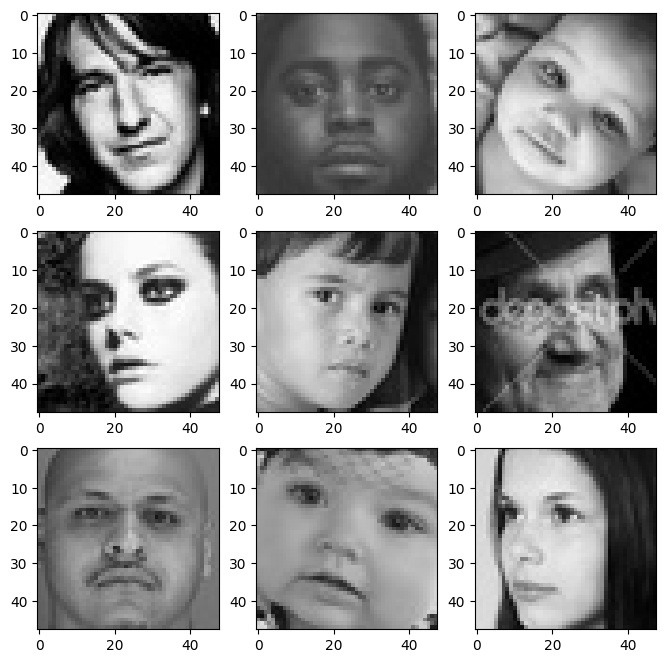

In [ ]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

Neutral faces don’t really show much emotion. The mouth usually sits flat and the eyes look normal, not wide or squinting. The eyebrows stay relaxed and there isn’t much movement in the face overall. It’s basically the default or resting face without any strong signals. What makes it unique is actually the lack of anything dramatic, no smile, no frown, no raised brows, which helps tell it apart from all the others.

### **Surprised**

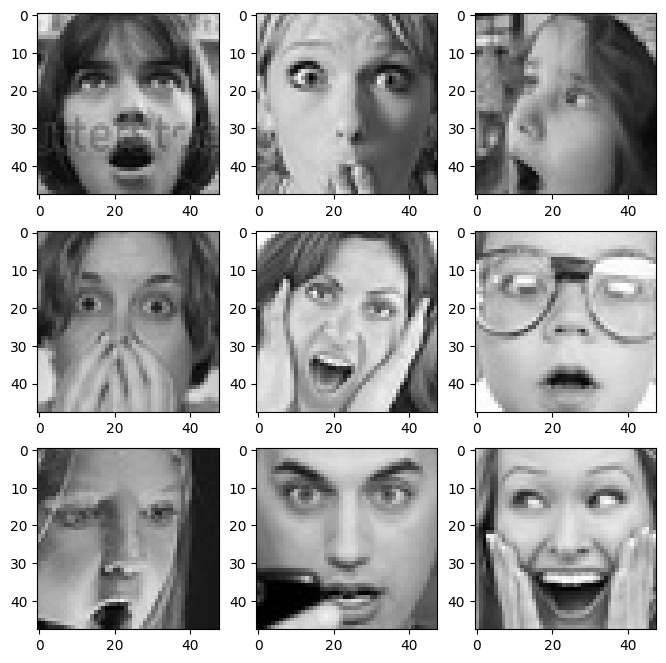

In [ ]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

Surprised faces are very expressive. The eyes go wide open, the eyebrows shoot up and the mouth often opens too. Some people look shocked, others just really curious, but either way, the expression is clear and strong. It’s probably the most obvious one out of all the emotions. The main clue is how alert the upper face looks, especially the eyes and brows, which isn’t something you’d see in happy, sad or neutral expressions.

## **Checking Distribution of Classes**

Number of images in the class 'happy':    3976
Number of images in the class 'sad':      3982
Number of images in the class 'neutral':  3978
Number of images in the class 'surprise': 3173


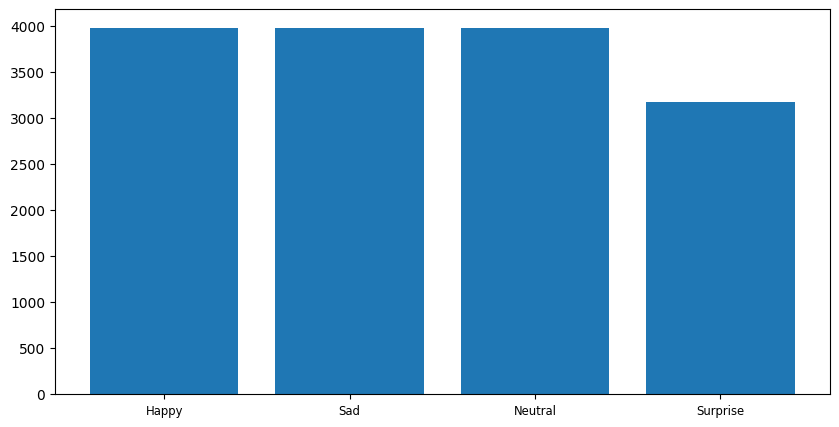

In [ ]:
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':     ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral': ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':", num_surprise)


#histogram for EDA
plt.figure(figsize = (10, 5))
data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}
df = pd.Series(data)
plt.bar(range(len(df)), df.values, align = 'center')
plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.show()

**Observations and Insights:**

The classes in the dataset are not perfectly balanced. While happy, sad, and neutral each have around 3976–3982 images, the surprise class has noticeably fewer, with only 3173 images, about 20% less. This is not a severe imbalance, but it is enough to potentially affect model performance, particularly for the surprise class, which may end up being underrepresented during learning. That said, this could lead to lower recall or precision for that class unless we apply techniques like class weighting.

Performing basic exploratory data analysis (EDA) here would be useful. A bar plot of class distribution could show the imbalance, and visualizing sample images from each class helps us understand the dataset’s diversity. Additionally, checking image consistency such as shapes, pixel ranges and scanning for any corrupted files would help ensure a clean training process. While the dataset is quite good, this data imbalance should be monitored to avoid biased model predictions.

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [12]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   brightness_range = (0., 2.),
                                   rescale = 1. / 255,
                                   shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_validation = ImageDataGenerator(rescale = 1. / 255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (img_size, img_size),
                                                        color_mode = 'rgb',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

datagen_test = ImageDataGenerator(rescale = 1. / 255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [67]:
model1 = Sequential()

# Add the first Convolutional block
model1.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Add the second Convolutional block
model1.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Add the third Convolutional block
model1.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# Add the Flatten layer
model1.add(Flatten())

# Add the first Dense layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.4))

# Add the Final layer
model1.add(Dense(4, activation='softmax'))

# Print model summary
# model1.summary()

### **Compiling and Training the Model**

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
checkpoint = ModelCheckpoint("./model1.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Compile the model
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model with callbacks
history1 = model1.fit(train_set,
                      epochs=20,
                      validation_data=validation_set,
                      callbacks=callbacks_list)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2732 - loss: 1.3867
Epoch 1: val_accuracy improved from -inf to 0.44485, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.2732 - loss: 1.3867 - val_accuracy: 0.4448 - val_loss: 1.2898 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3952 - loss: 1.2937
Epoch 2: val_accuracy improved from 0.44485 to 0.50492, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.3953 - loss: 1.2936 - val_accuracy: 0.5049 - val_loss: 1.1418 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4696 - loss: 1.1779
Epoch 3: val_accuracy improved from 0.50492 to 0.57304, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.4697 - loss: 1.1779 - val_accuracy: 0.5730 - val_loss: 1.0210 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5095 - loss: 1.0981
Epoch 4: val_accuracy improved from 0.57304 to 0.59735, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.5095 - loss: 1.0980 - val_accuracy: 0.5973 - val_loss: 0.9547 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5313 - loss: 1.0621
Epoch 5: val_accuracy improved from 0.59735 to 0.60679, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.5313 - loss: 1.0620 - val_accuracy: 0.6068 - val_loss: 0.9372 - learning_rate: 0.0010
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5534 - loss: 1.0293
Epoch 6: val_accuracy improved from 0.60679 to 0.60920, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.5534 - loss: 1.0293 - val_accuracy: 0.6092 - val_loss: 0.9209 - learning_rate: 0.0010
Epoch 7/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5670 - loss: 0.9968
Epoch 7: val_accuracy improved from 0.60920 to 0.62447, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.5670 - loss: 0.9968 - val_accuracy: 0.6245 - val_loss: 0.8816 - learning_rate: 0.0010
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5836 - loss: 0.9699
Epoch 8: val_accuracy improved from 0.62447 to 0.63954, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.5836 - loss: 0.9699 - val_accuracy: 0.6395 - val_loss: 0.8560 - learning_rate: 0.0010
Epoch 9/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5871 - loss: 0.9567
Epoch 9: val_accuracy improved from 0.63954 to 0.65039, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.5871 - loss: 0.9567 - val_accuracy: 0.6504 - val_loss: 0.8493 - learning_rate: 0.0010
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5951 - loss: 0.9363
Epoch 10: val_accuracy did not improve from 0.65039
473/473 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.5951 - loss: 0.9363 - val_accuracy: 0.6432 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 11/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6056 - loss: 0.9230
Epoch 11: val_accuracy improved from 0.65039 to 0.65903, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.6056 - loss: 0.9231 - val_accuracy: 0.6590 - val_loss: 0.8427 - learning_rate: 0.0010
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6099 - loss: 0.9193
Epoch 12: val_accuracy did not improve from 0.65903
473/473 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.6100 - loss: 0.9193 - val_accuracy: 0.6510 - val_loss: 0.8341 - learning_rate: 0.0010
Epoch 13/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6109 - loss: 0.9068
Epoch 13: val_accuracy did not improve from 0.65903
473/473 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.6109 - loss: 0.9068 - val_accuracy: 0.6524 - val_loss: 0.8350 - learning_rate: 0.0010
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6100 - loss: 0.9013
Epoch 14: val_accuracy improved from 0.65903 to 0.67430, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.6100 - loss: 0.9013 - val_accuracy: 0.6743 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 15/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6309 - loss: 0.8767
Epoch 15: val_accuracy improved from 0.67430 to 0.67651, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.6309 - loss: 0.8767 - val_accuracy: 0.6765 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 16/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6223 - loss: 0.8774
Epoch 16: val_accuracy did not improve from 0.67651
473/473 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.6224 - loss: 0.8774 - val_accuracy: 0.6753 - val_loss: 0.7864 - learning_rate: 0.0010
Epoch 17/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6292 - loss: 0.8740
Epoch 17: val_accuracy improved from 0.67651 to 0.68696, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.6292 - loss: 0.8740 - val_accuracy: 0.6870 - val_loss: 0.7857 - learning_rate: 0.0010
Epoch 18/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6450 - loss: 0.8462
Epoch 18: val_accuracy did not improve from 0.68696
473/473 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.6450 - loss: 0.8463 - val_accuracy: 0.6751 - val_loss: 0.7830 - learning_rate: 0.0010
Epoch 19/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6453 - loss: 0.8386
Epoch 19: val_accuracy improved from 0.68696 to 0.69098, saving model to ./model1.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.6453 - loss: 0.8386 - val_accuracy: 0.6910 - val_loss: 0.7644 - learning_rate: 0.0010
Epoch 20/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6490 - loss: 0.8341
Epoch 20: val_accuracy did not improve from 0.69098
473/473 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.6490 - loss: 0.8342 - val_accuracy: 0.6819 - val_loss: 0.7672 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 19.


### **Evaluating the Model on the Test Set**

In [15]:
# Evaluate on test set
test_loss, test_accuracy = model1.evaluate(test_set)

print("Test Loss: {:.4f}".format(test_loss))
print("Test Accuracy: {:.4f}".format(test_accuracy))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6990 - loss: 0.7017 
Test Loss: 0.7361
Test Accuracy: 0.7031


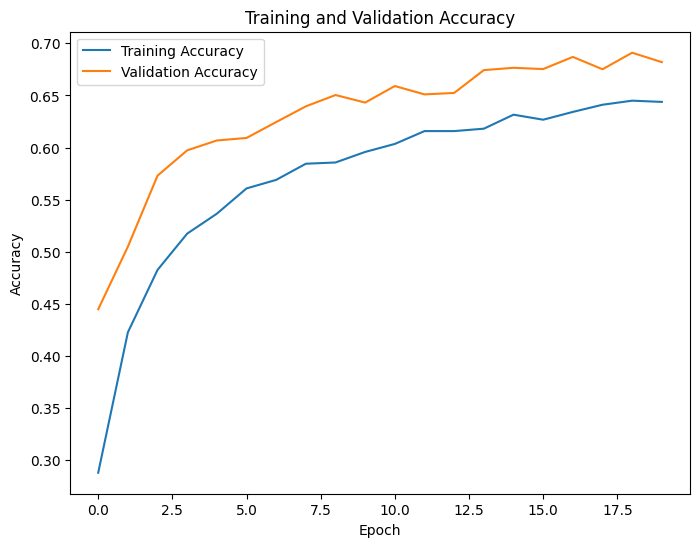

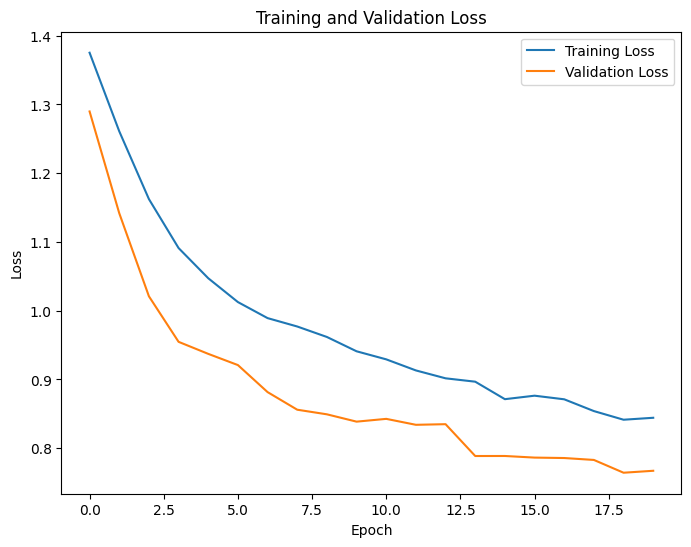

In [16]:
#plot accuracy and loss curves

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Observations and Insights:**

The training and validation accuracy curves show a clear upward trend, indicating that the model is learning well. By the end of training, the validation accuracy reaches close to 70 percent while training accuracy is slightly below that. This gap suggests that the model generalizes fairly well and is not heavily overfitting.

The loss curves show a consistent decrease for both training and validation loss. Validation loss flattens around 0.8, and the training loss follows closely behind. There are no signs of severe overfitting, since validation loss does not increase at the end of training. In general, the model is stable and learning useful patterns from the data. Further improvements could come from tuning hyperparameters or adding regularization, but the current base model is performing well.

**Are CNNs the right approach? Should we have used ANNs instead?**

Convolutional Neural Networks are the right choice here. The task involves image data where spatial relationships between pixels are important. CNNs are specifically designed to handle this kind of data through convolutional filters that capture local patterns such as edges, shapes and textures. CNNs is advantageous over ANN here since they preserve spatial relationships in the data, with fewer parameters by sharing weights through convolutional kernels. Also, they are able to detect patterns like facial features (eyes, mouth, eyebrows) that are essential for emotion recognition.

On the other hand, artificial Neural Networks (fully connected layers only) do not exploit the spatial structure of images. Using ANNs here would require flattening the image, which discards important spatial information and leads to poor performance. Also, ANNs would need many more parameters and would be less efficient.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Creating sequential model
model2 = Sequential()

# Add the first Convolutional block
model2.add(Conv2D(256, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

# Add the second Convolutional block
model2.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

# Add the third Convolutional block
model2.add(Conv2D(64, kernel_size=2, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

# Add the fourth Convolutional block
model2.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))

# Add the Flatten layer
model2.add(Flatten())

# Adding the Dense layers
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


### **Compiling and Training the Model**

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define callbacks
checkpoint = ModelCheckpoint("./model2.h5",
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')  # monitor='val_loss' so mode should be 'min'

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history2 = model2.fit(train_set,
                      epochs=20,
                      validation_data=validation_set,
                      callbacks=callbacks_list)


Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.3692 - loss: 1.3280
Epoch 1: val_loss improved from inf to 1.14195, saving model to ./model2.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 194s 408ms/step - accuracy: 0.3694 - loss: 1.3277 - val_accuracy: 0.4935 - val_loss: 1.1419 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.5372 - loss: 1.0461
Epoch 2: val_loss improved from 1.14195 to 0.92222, saving model to ./model2.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 180s 381ms/step - accuracy: 0.5372 - loss: 1.0461 - val_accuracy: 0.6126 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.5881 - loss: 0.9428
Epoch 3: val_loss improved from 0.92222 to 0.90157, saving model to ./model2.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 182s 384ms/step - accuracy: 0.5881 - loss: 0.9428 - val_accuracy: 0.6134 - val_loss: 0.9016 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.6315 - loss: 0.8683
Epoch 4: val_loss improved from 0.90157 to 0.83101, saving model to ./model2.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 184s 389ms/step - accuracy: 0.6315 - loss: 0.8683 - val_accuracy: 0.6556 - val_loss: 0.8310 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6514 - loss: 0.8264
Epoch 5: val_loss did not improve from 0.83101
473/473 ━━━━━━━━━━━━━━━━━━━━ 177s 374ms/step - accuracy: 0.6514 - loss: 0.8264 - val_accuracy: 0.6450 - val_loss: 0.8645 - learning_rate: 0.0010
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6708 - loss: 0.7815
Epoch 6: val_loss improved from 0.83101 to 0.78168, saving model to ./model2.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 179s 379ms/step - accuracy: 0.6707 - loss: 0.7816 - val_accuracy: 0.6912 - val_loss: 0.7817 - learning_rate: 0.0010
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.6794 - loss: 0.7736
Epoch 7: val_loss did not improve from 0.78168
473/473 ━━━━━━━━━━━━━━━━━━━━ 180s 381ms/step - accuracy: 0.6794 - loss: 0.7735 - val_accuracy: 0.6747 - val_loss: 0.8009 - learning_rate: 0.0010
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.7007 - loss: 0.7224
Epoch 8: val_loss did not improve from 0.78168
473/473 ━━━━━━━━━━━━━━━━━━━━ 178s 377ms/step - accuracy: 0.7007 - loss: 0.7224 - val_accuracy: 0.6484 - val_loss: 0.8531 - learning_rate: 0.0010
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7122 - loss: 0.6879
Epoch 9: val_loss improved from 0.78168 to 0.76684, saving model to ./model2.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 181s 382ms/step - accuracy: 0.7122 - loss: 0.6879 - val_accuracy: 0.6864 - val_loss: 0.7668 - learning_rate: 0.0010
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7300 - loss: 0.6629
Epoch 10: val_loss did not improve from 0.76684
473/473 ━━━━━━━━━━━━━━━━━━━━ 177s 373ms/step - accuracy: 0.7300 - loss: 0.6629 - val_accuracy: 0.6872 - val_loss: 0.7694 - learning_rate: 0.0010
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.7371 - loss: 0.6310
Epoch 11: val_loss did not improve from 0.76684
473/473 ━━━━━━━━━━━━━━━━━━━━ 176s 372ms/step - accuracy: 0.7371 - loss: 0.6310 - val_accuracy: 0.6647 - val_loss: 0.8588 - learning_rate: 0.0010
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.7626 - loss: 0.5804
Epoch 12: val_loss did not improve from 0.76684

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 ━━━━━━━━━━━━━━━━━━━━ 178s 376ms/step - accuracy: 0.7626 - loss: 0.5

### **Evaluating the Model on the Test Set**

In [19]:
# Evaluate model2 on test data
test_loss2, test_accuracy2 = model2.evaluate(test_set)

print("Test Loss (Model 2): {:.4f}".format(test_loss2))
print("Test Accuracy (Model 2): {:.4f}".format(test_accuracy2))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7125 - loss: 0.7033
Test Loss (Model 2): 0.7238
Test Accuracy (Model 2): 0.6953


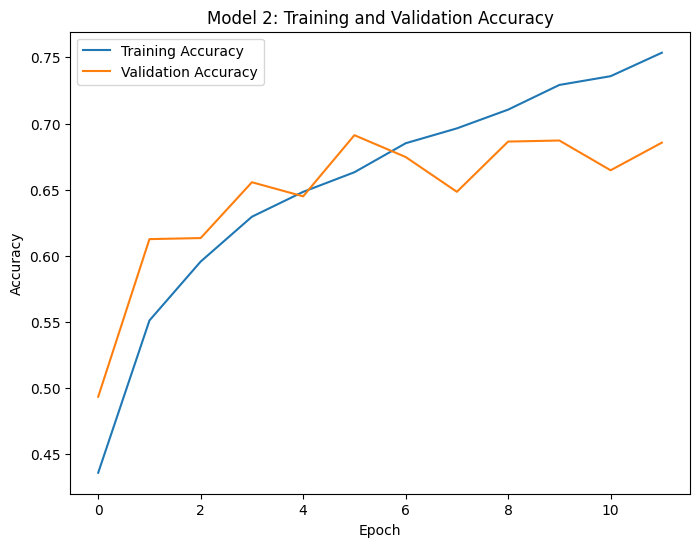

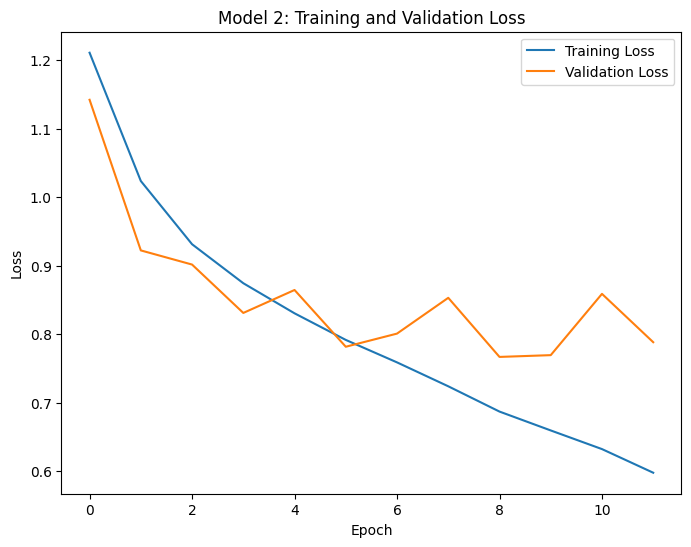

In [20]:
#accuracy and loss Curve
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Observations and Insights:**

Model 2 demonstrated reasonable performance on this task. It achieved a test accuracy of around 69.5 percent, which indicates that it was able to learn useful patterns from the data. However, the training curves suggest some room for improvement. The training accuracy continued to increase steadily, but the validation accuracy plateaued and the validation loss fluctuated after several epochs, indicating early signs of overfitting. This suggests that while the model fits the training data well, its ability to generalize to unseen data is somewhat limited. One contributing factor could be the model's complexity without dropout layers, which may have made it prone to memorizing the training data. Regarding color mode, using 'rgb' was not necessary here, as the images are originally black and white. Feeding them as grayscale would likely simplify the model’s input, reduce unnecessary computations, and potentially improve generalization. Overall, Model 2 provided a solid result but could benefit from adjustments to improve its robustness and efficiency.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [21]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   brightness_range = (0., 2.),
                                   rescale = 1./255,
                                   shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (img_size, img_size),
                                                        color_mode = 'rgb',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                        shuffle = False)

datagen_test = ImageDataGenerator(rescale = 1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [65]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [64]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Import VGG16 up to 'block5_pool' layer
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))
vgg.trainable = False  # Freeze VGG16 layers

# Select output of 'block5_pool' layer
vgg_output = vgg.get_layer('block5_pool').output

# Add custom Fully Connected layers on top
x = Flatten()(vgg_output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Final output layer
output = Dense(4, activation='softmax')(x)

# Build the model
model_vgg = Model(inputs=vgg.input, outputs=output)

pred = Dense(4, activation='softmax')(x)

# # Print model summary
# model_vgg.summary()


### **Compiling and Training the VGG16 Model**

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

vggmodel = Model(vgg.input, pred)

# Define callbacks
checkpoint = ModelCheckpoint("./vggmodel.h5",
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Fit the model
history = model_vgg.fit(train_set,
                       epochs=20,
                       validation_data=validation_set,
                       callbacks=callbacks_list)


Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.3581 - loss: 1.6164
Epoch 1: val_loss improved from inf to 1.13897, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 241s 507ms/step - accuracy: 0.3582 - loss: 1.6161 - val_accuracy: 0.4917 - val_loss: 1.1390 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.4266 - loss: 1.2577
Epoch 2: val_loss improved from 1.13897 to 1.12507, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 232s 490ms/step - accuracy: 0.4266 - loss: 1.2577 - val_accuracy: 0.4997 - val_loss: 1.1251 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4472 - loss: 1.2078
Epoch 3: val_loss improved from 1.12507 to 1.08371, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 232s 490ms/step - accuracy: 0.4472 - loss: 1.2078 - val_accuracy: 0.5278 - val_loss: 1.0837 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.4661 - loss: 1.1756
Epoch 4: val_loss improved from 1.08371 to 1.08315, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 233s 493ms/step - accuracy: 0.4661 - loss: 1.1756 - val_accuracy: 0.5351 - val_loss: 1.0832 - learning_rate: 0.0010
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.4664 - loss: 1.1723
Epoch 5: val_loss improved from 1.08315 to 1.08074, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 240s 508ms/step - accuracy: 0.4664 - loss: 1.1723 - val_accuracy: 0.5300 - val_loss: 1.0807 - learning_rate: 0.0010
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.4699 - loss: 1.1560
Epoch 6: val_loss did not improve from 1.08074
473/473 ━━━━━━━━━━━━━━━━━━━━ 233s 492ms/step - accuracy: 0.4699 - loss: 1.1561 - val_accuracy: 0.5218 - val_loss: 1.0933 - learning_rate: 0.0010
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.4793 - loss: 1.1658
Epoch 7: val_loss improved from 1.08074 to 1.07796, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 221s 467ms/step - accuracy: 0.4794 - loss: 1.1657 - val_accuracy: 0.5198 - val_loss: 1.0780 - learning_rate: 0.0010
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.4812 - loss: 1.1516
Epoch 8: val_loss did not improve from 1.07796
473/473 ━━━━━━━━━━━━━━━━━━━━ 213s 450ms/step - accuracy: 0.4812 - loss: 1.1516 - val_accuracy: 0.5130 - val_loss: 1.1089 - learning_rate: 0.0010
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.4779 - loss: 1.1550
Epoch 9: val_loss improved from 1.07796 to 1.05829, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 215s 455ms/step - accuracy: 0.4779 - loss: 1.1550 - val_accuracy: 0.5403 - val_loss: 1.0583 - learning_rate: 0.0010
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.4803 - loss: 1.1576
Epoch 10: val_loss did not improve from 1.05829
473/473 ━━━━━━━━━━━━━━━━━━━━ 209s 442ms/step - accuracy: 0.4803 - loss: 1.1576 - val_accuracy: 0.5363 - val_loss: 1.0624 - learning_rate: 0.0010
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.4834 - loss: 1.1482
Epoch 11: val_loss did not improve from 1.05829
473/473 ━━━━━━━━━━━━━━━━━━━━ 211s 445ms/step - accuracy: 0.4834 - loss: 1.1482 - val_accuracy: 0.5051 - val_loss: 1.1101 - learning_rate: 0.0010
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.4872 - loss: 1.1475
Epoch 12: val_loss improved from 1.05829 to 1.05718, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 215s 455ms/step - accuracy: 0.4872 - loss: 1.1475 - val_accuracy: 0.5451 - val_loss: 1.0572 - learning_rate: 0.0010
Epoch 13/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.4879 - loss: 1.1446
Epoch 13: val_loss did not improve from 1.05718
473/473 ━━━━━━━━━━━━━━━━━━━━ 217s 458ms/step - accuracy: 0.4879 - loss: 1.1446 - val_accuracy: 0.5433 - val_loss: 1.0608 - learning_rate: 0.0010
Epoch 14/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.4918 - loss: 1.1504
Epoch 14: val_loss did not improve from 1.05718
473/473 ━━━━━━━━━━━━━━━━━━━━ 224s 474ms/step - accuracy: 0.4918 - loss: 1.1504 - val_accuracy: 0.5361 - val_loss: 1.0588 - learning_rate: 0.0010
Epoch 15/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.4977 - loss: 1.1334
Epoch 15: val_loss improved from 1.05718 to 1.05128, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 252s 534ms/step - accuracy: 0.4977 - loss: 1.1334 - val_accuracy: 0.5441 - val_loss: 1.0513 - learning_rate: 0.0010
Epoch 16/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5028 - loss: 1.1182
Epoch 16: val_loss did not improve from 1.05128
473/473 ━━━━━━━━━━━━━━━━━━━━ 237s 500ms/step - accuracy: 0.5028 - loss: 1.1182 - val_accuracy: 0.5324 - val_loss: 1.0720 - learning_rate: 0.0010
Epoch 17/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.4987 - loss: 1.1285
Epoch 17: val_loss improved from 1.05128 to 1.04927, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 238s 503ms/step - accuracy: 0.4987 - loss: 1.1285 - val_accuracy: 0.5517 - val_loss: 1.0493 - learning_rate: 0.0010
Epoch 18/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.4998 - loss: 1.1267
Epoch 18: val_loss did not improve from 1.04927
473/473 ━━━━━━━━━━━━━━━━━━━━ 233s 493ms/step - accuracy: 0.4998 - loss: 1.1267 - val_accuracy: 0.5198 - val_loss: 1.0907 - learning_rate: 0.0010
Epoch 19/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.4994 - loss: 1.1264
Epoch 19: val_loss did not improve from 1.04927
473/473 ━━━━━━━━━━━━━━━━━━━━ 258s 545ms/step - accuracy: 0.4994 - loss: 1.1264 - val_accuracy: 0.5373 - val_loss: 1.0596 - learning_rate: 0.0010
Epoch 20/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.4926 - loss: 1.1269
Epoch 20: val_loss improved from 1.04927 to 1.03995, saving model to ./vggmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 243s 514ms/step - accuracy: 0.4926 - loss: 1.1269 - val_accuracy: 0.5497 - val_loss: 1.0399 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 20.


### **Evaluating the VGG16 model**

In [31]:
# Evaluate model_vgg on test data
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(test_set)

print("Test Loss (VGG16 model): {:.4f}".format(test_loss_vgg))
print("Test Accuracy (VGG16 model): {:.4f}".format(test_accuracy_vgg))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.5302 - loss: 1.0899
Test Loss (VGG16 model): 1.0845
Test Accuracy (VGG16 model): 0.5312


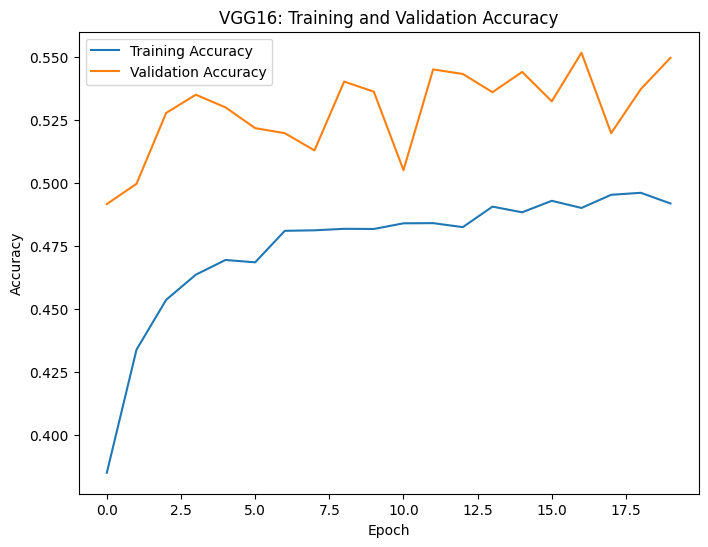

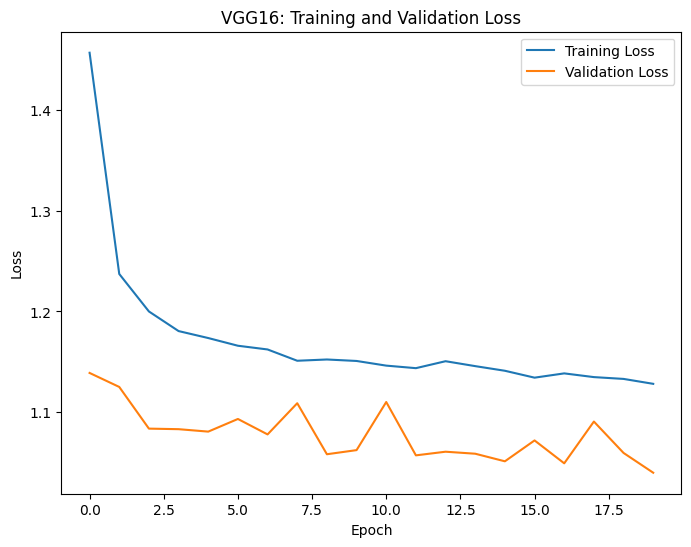

In [32]:
#accuracy and loss curves

# accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:**

The VGG16 model reached a test accuracy of about 53 percent with a test loss of about 1.08. The training accuracy showed a steady increase during the first few epochs and then plateaued around 48 to 49 percent. The validation accuracy, on the other hand, improved quickly early on and then fluctuated but stayed slightly ahead of training accuracy, hovering around 53 to 55 percent.

The training and validation loss curves both showed a clear downward trend initially, though the validation loss flattened out earlier than the training loss. There is no major gap between training and validation loss, which suggests that the model is not strongly overfitting but has limited capacity to further improve on the current data.

To answer the above questions, training accuracy improved steadily during the first part of training but plateaued after around epoch 10. It no longer showed consistent upward movement, indicating that the model was approaching its learning limit with the current setup. On the other hand, validation accuracy improved quickly early on and then fluctuated slightly around the 53 to 55 percent range. It did not show consistent improvement after the first few epochs, which again suggests that the model is learning up to a certain point but is not able to generalize better without further changes.

The VGG16 model improved but seems to have hit a performance ceiling on this dataset. Additional regularization, more dense layers, or fine-tuning the base VGG16 layers could help. Another key factor is that the facial emotion dataset is relatively small and subtle, which makes further accuracy improvements challenging without more advanced techniques or additional data.



**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [35]:
# import tensorflow as tf
# import tensorflow.keras.applications as ap
# from tensorflow.keras import Model

# Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
# Resnet.summary()

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [63]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Load ResNet101
Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
# Resnet.summary()
# Select transfer layer
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable = False

# Add classification layers on top of it

# Flatten the output
x = Flatten()(transfer_layer_Resnet.output)
# Add a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)
# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)
# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)
# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)
# Add a Batch Normalization layer
x = BatchNormalization()(x)
# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)
# Initialize the model (correct the input to use Resnet input, not vgg input)
resnetmodel = Model(Resnet.input, pred)


### **Compiling and Training the Model**

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define callbacks
checkpoint = ModelCheckpoint("./Resnetmodel.h5",
                             monitor='val_accuracy',   # small correction: 'val_accuracy' instead of 'val_acc'
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# 1. Compile your resnetmodel
resnetmodel.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# 2. Fit the model
history = resnetmodel.fit(train_set,
                          epochs=10,   # using 10 epochs as in your example
                          validation_data=validation_set,
                          callbacks=callbacks_list)


Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.2562 - loss: 1.5612
Epoch 1: val_accuracy improved from -inf to 0.36669, saving model to ./Resnetmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 224s 463ms/step - accuracy: 0.2562 - loss: 1.5610 - val_accuracy: 0.3667 - val_loss: 1.3584 - learning_rate: 0.0010
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.2617 - loss: 1.4076
Epoch 2: val_accuracy did not improve from 0.36669
473/473 ━━━━━━━━━━━━━━━━━━━━ 206s 436ms/step - accuracy: 0.2617 - loss: 1.4076 - val_accuracy: 0.3667 - val_loss: 1.3452 - learning_rate: 0.0010
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.2548 - loss: 1.4029
Epoch 3: val_accuracy did not improve from 0.36669
473/473 ━━━━━━━━━━━━━━━━━━━━ 214s 453ms/step - accuracy: 0.2548 - loss: 1.4029 - val_accuracy: 0.2289 - val_loss: 1.3747 - learning_rate: 0.0010
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2642 - loss: 1.3974
Epoch 4: val_accuracy did not improve from 0.36669
473/473 ━━━━━━━━━━━━━━━━━━━━ 963s 2s/step - accuracy: 0.2642 - loss: 1.3974 - val_accuracy: 0.2443 - val_loss: 1.3650 - learning_rate: 0.0010
Epoch 5/1

### **Evaluating the ResNet Model**

In [38]:
# Evaluate resnetmodel on test data
test_loss_resnet, test_accuracy_resnet = resnetmodel.evaluate(test_set)

print("Test Loss (ResNet model): {:.4f}".format(test_loss_resnet))
print("Test Accuracy (ResNet model): {:.4f}".format(test_accuracy_resnet))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.4667 - loss: 1.3012
Test Loss (ResNet model): 1.4158
Test Accuracy (ResNet model): 0.2500


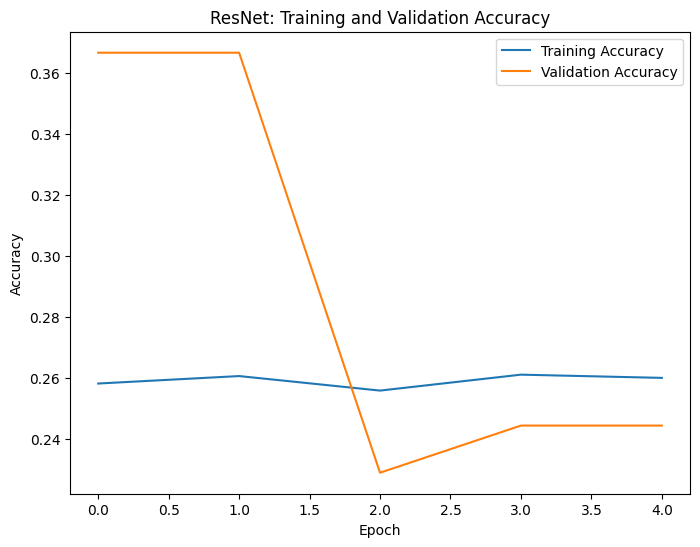

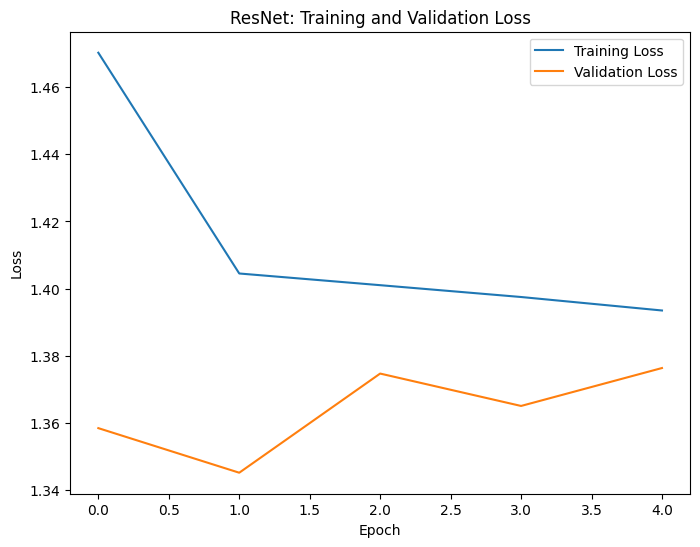

In [39]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Observations and Insights:**
The ResNet model achieved a test accuracy of about 25 percent and a test loss of about 1.42, which is quite low compared to the other models. The training accuracy started around 26 percent and did not improve meaningfully, staying flat across all epochs. The validation accuracy initially started a little higher but quickly dropped and stayed low, indicating poor generalization.

The loss curves reflect this pattern as well. Training loss decreased only slightly, and validation loss fluctuated with no consistent improvement. The early stopping callback likely triggered after four epochs because the model was not showing progress.

The current architecture built on top of ResNet is likely too shallow or not well-optimized for this task. The transfer layer conv5_block3_add may be too deep to use without fine-tuning earlier layers, or the fully connected layers added on top might not have enough capacity to adapt the pretrained features to the facial emotion dataset. The ResNet model in its current form is underfitting and not learning the task effectively. 

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [46]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

# EfficientNet.summary()

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [49]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Load EfficientNetB0
EfficientNet = ap.EfficientNetB0(include_top=False, weights='imagenet', input_shape=(48, 48, 3))
# EfficientNet.summary()

# Select transfer layer
transfer_layer_EfficientNet = EfficientNet.get_layer('block6d_activation')
EfficientNet.trainable = False

# Add your Flatten layer
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Add your final Dense layer with 4 neurons and softmax activation function
pred = Dense(4, activation='softmax')(x)

# Initialize the model
Efficientnetmodel = Model(EfficientNet.input, pred)


### **Compiling and Training the Model**

In [50]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define callbacks
checkpoint = ModelCheckpoint("./Efficientnetmodel.h5",
                             monitor='val_accuracy',  # correct to 'val_accuracy'
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Compile your Efficientnetmodel
Efficientnetmodel.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Fit the model
history = Efficientnetmodel.fit(train_set,
                                epochs=10,
                                validation_data=validation_set,
                                callbacks=callbacks_list)


Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2467 - loss: 1.6024
Epoch 1: val_accuracy improved from -inf to 0.24432, saving model to ./Efficientnetmodel.h5


473/473 ━━━━━━━━━━━━━━━━━━━━ 44s 86ms/step - accuracy: 0.2467 - loss: 1.6022 - val_accuracy: 0.2443 - val_loss: 1.3827 - learning_rate: 0.0010
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2611 - loss: 1.4066
Epoch 2: val_accuracy did not improve from 0.24432
473/473 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.2611 - loss: 1.4066 - val_accuracy: 0.2289 - val_loss: 1.3748 - learning_rate: 0.0010
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2645 - loss: 1.3896
Epoch 3: val_accuracy did not improve from 0.24432
473/473 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.2645 - loss: 1.3896 - val_accuracy: 0.2289 - val_loss: 1.3754 - learning_rate: 0.0010
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2596 - loss: 1.3849
Epoch 4: val_accuracy did not improve from 0.24432
473/473 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.2596 - loss: 1.3849 - val_accuracy: 0.2289 - val_loss: 1.3759 - learning_rate: 0.0010
Epoch 5/10
47

473/473 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.2613 - loss: 1.3820 - val_accuracy: 0.3667 - val_loss: 1.3704 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 10.


### **Evaluating the EfficientnetNet Model**

In [51]:
# Evaluate Efficientnetmodel on test data
test_loss_efficientnet, test_accuracy_efficientnet = Efficientnetmodel.evaluate(test_set)

print("Test Loss (EfficientNet model): {:.4f}".format(test_loss_efficientnet))
print("Test Accuracy (EfficientNet model): {:.4f}".format(test_accuracy_efficientnet))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4667 - loss: 1.3563
Test Loss (EfficientNet model): 1.3908
Test Accuracy (EfficientNet model): 0.2500


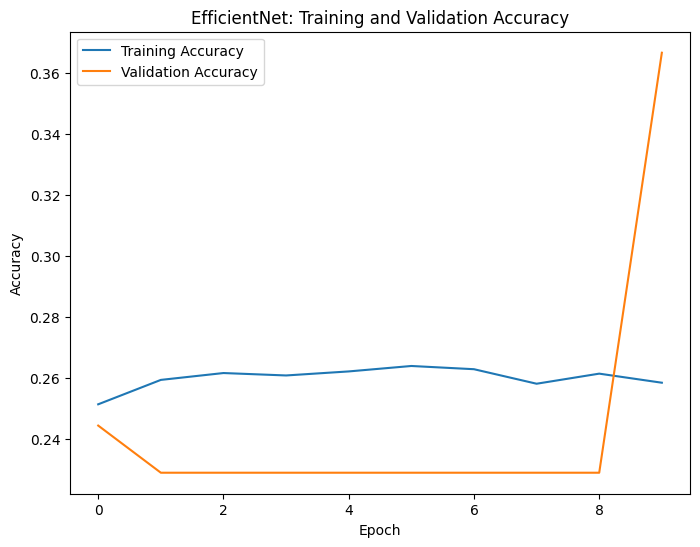

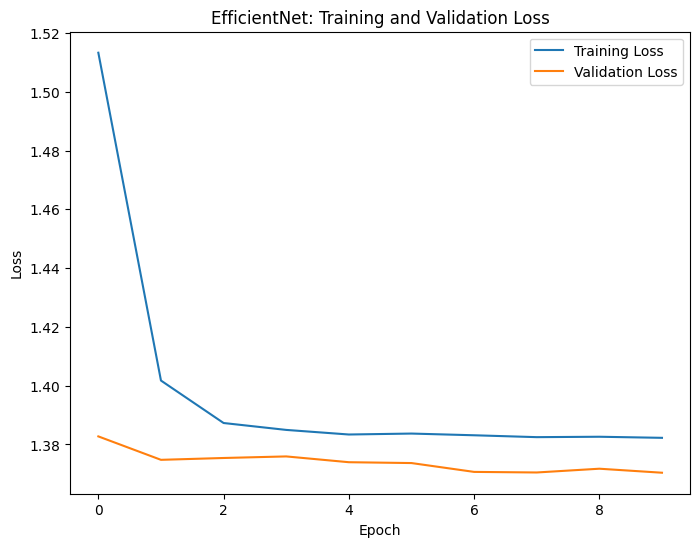

In [52]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNet: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('EfficientNet: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Observations and Insights:**

The EfficientNet model achieved a test accuracy of about 25 percent, with a test loss of about 1.39. This is roughly equivalent to random guessing for a 4-class classification problem. The training accuracy stayed flat around 26 percent, showing no real improvement during training. Validation accuracy also stayed low until the final epoch, where it spiked, likely due to some instability or noise rather than true learning. The loss curves confirm this pattern. Training loss decreased initially but then flattened out early. Validation loss also remained mostly flat, which shows that the model did not learn meaningful features for this task under the current setup. Among the three transfer learning models tested (VGG16, ResNet101, EfficientNetB0), only VGG16 showed moderately useful performance with test accuracy around 53 percent. Both ResNet and EfficientNet performed poorly (around 25 percent accuracy), which suggests that their current architectures were not well adapted to this problem.

**What is your overall performance of these Transfer Learning Architectures?**

Among the three transfer learning models tested (VGG16, ResNet101, EfficientNetB0), only VGG16 showed moderately useful performance with test accuracy around 53 percent. Both ResNet and EfficientNet performed poorly (around 25 percent accuracy), which suggests that their current architectures were not well adapted to this problem.

**Can we draw a comparison of these models' performances? Are we satisfied with the accuracies?**

VGG16 performed the best so far. ResNet and EfficientNet underperformed, likely due to how the models were configured. The architectures used on top of the transfer layers were shallow, and the base models were frozen, preventing useful adaptation to the facial emotion dataset. No, the current accuracies are not satisfactory yet. More work is needed on architecture design and fine-tuning.

**Do you think our issue lies with 'rgb' color_mode?**

No, the issue is not mainly due to the 'rgb' color_mode. While the original images are grayscale, most modern pretrained models (VGG, ResNet, EfficientNet) expect 3-channel input. Feeding grayscale images repeated across 3 channels is a standard practice and should not cause such poor performance alone. The problem is more related to using shallow architectures on top of the pretrained models while keeping the base models fully frozen

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [53]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   brightness_range = (0., 2.),
                                   rescale = 1./255,
                                   shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size = (img_size, img_size),
                                                        color_mode = 'grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                        shuffle = False)

datagen_test = ImageDataGenerator(rescale = 1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [54]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 3rd CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))

# Add 5th CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))

# Flatten layer
model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.3))

# Second fully connected layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.3))

# Final output layer
model3.add(Dense(no_of_classes, activation='softmax'))

### **Compiling and Training the Model**

In [57]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam

epochs = 35

steps_per_epoch = train_set.n // train_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size

# Define callbacks
checkpoint = ModelCheckpoint("model3.weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,
                              min_lr=0.0001, mode='auto')

csv_logger = CSVLogger('training_model3.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

# Compile model3
model3.compile(optimizer=Adam(learning_rate=0.003),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Fit model3
history = model3.fit(train_set,
                     epochs=epochs,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=validation_set,
                     validation_steps=validation_steps,
                     callbacks=callbacks)

Epoch 1/35


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


472/472 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.2723 - loss: 1.5862
Epoch 1: saving model to model3.weights.h5
472/472 ━━━━━━━━━━━━━━━━━━━━ 163s 343ms/step - accuracy: 0.2723 - loss: 1.5860 - val_accuracy: 0.4097 - val_loss: 1.3088 - learning_rate: 0.0030
Epoch 2/35
  1/472 ━━━━━━━━━━━━━━━━━━━━ 2:27 313ms/step - accuracy: 0.3125 - loss: 1.3514

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model3.weights.h5
472/472 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.3125 - loss: 1.3514 - val_accuracy: 0.4085 - val_loss: 1.3157 - learning_rate: 0.0030
Epoch 3/35
472/472 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.4017 - loss: 1.2903
Epoch 3: saving model to model3.weights.h5
472/472 ━━━━━━━━━━━━━━━━━━━━ 151s 320ms/step - accuracy: 0.4018 - loss: 1.2902 - val_accuracy: 0.4692 - val_loss: 1.1329 - learning_rate: 0.0030
Epoch 4/35
  1/472 ━━━━━━━━━━━━━━━━━━━━ 2:03 261ms/step - accuracy: 0.4375 - loss: 1.0799
Epoch 4: saving model to model3.weights.h5
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4375 - loss: 1.0799 - val_accuracy: 0.4823 - val_loss: 1.1153 - learning_rate: 0.0030
Epoch 5/35
472/472 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.4964 - loss: 1.1315
Epoch 5: saving model to model3.weights.h5
472/472 ━━━━━━━━━━━━━━━━━━━━ 150s 318ms/step - accuracy: 0.4964 - loss: 1.1315 - val_accuracy: 0.5012 - val_loss: 1.1261 - learnin

### **Evaluating the Model on Test Set**

In [58]:
# Evaluate model3 on test data
test_loss_model3, test_accuracy_model3 = model3.evaluate(test_set)

print("Test Loss (Model 3 - Complex CNN): {:.4f}".format(test_loss_model3))
print("Test Accuracy (Model 3 - Complex CNN): {:.4f}".format(test_accuracy_model3))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6885 - loss: 0.6539
Test Loss (Model 3 - Complex CNN): 0.6792
Test Accuracy (Model 3 - Complex CNN): 0.6875


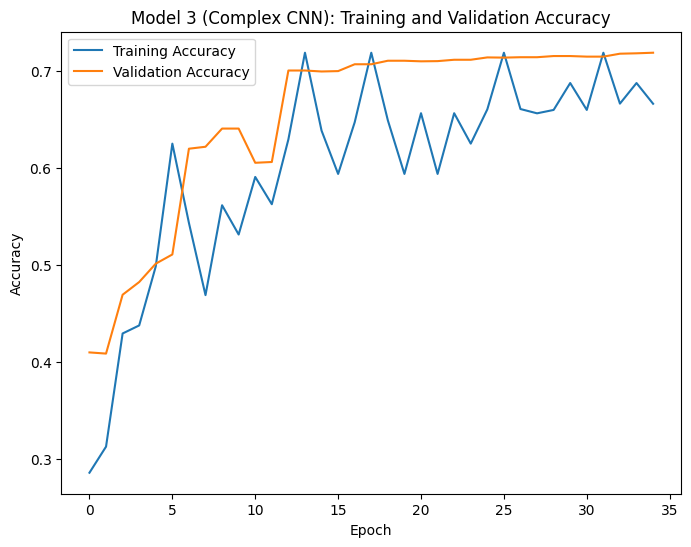

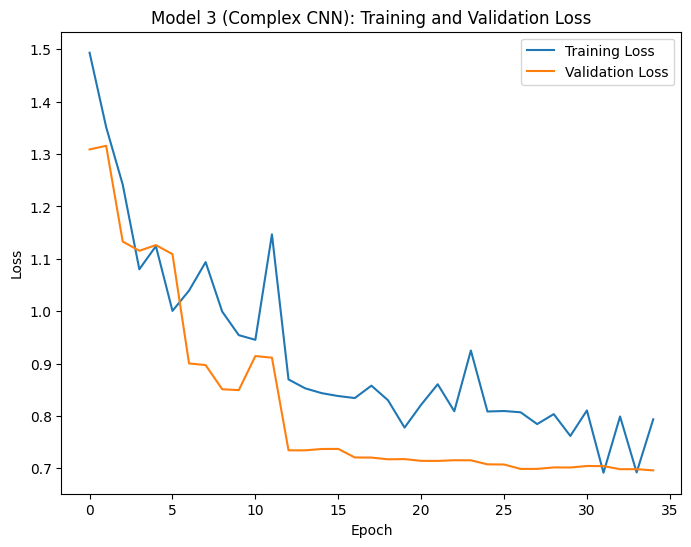

In [59]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 (Complex CNN): Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 3 (Complex CNN): Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Observations and Insights:**

Model 3 achieved a test accuracy of about 68.75 percent, with a test loss of 0.68. This is the best performance seen so far among all models in this project. The training and validation accuracy curves show steady improvement over the first 10–15 epochs. After that, validation accuracy stabilized at about 70 percent, while training accuracy continued to fluctuate but reached similar levels. This is a good sign of generalization.

The training and validation loss curves show a steady downward trend. Validation loss remained low and stable after about epoch 15, while training loss continued to decrease with some oscillation. There is no strong sign of overfitting here, as both curves remain close together throughout training. The model benefitted from its greater depth and larger capacity, as well as using grayscale input, which appears well-suited to this dataset. Batch normalization and dropout helped regularize the learning process effectively.

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
              precision    recall  f1-score   support

       happy       0.78      0.78      0.78        32
         sad       0.52      0.50      0.51        32
     neutral       0.57      0.66      0.61        32
    surprise       0.93      0.81      0.87        32

    accuracy                           0.69       128
   macro avg       0.70      0.69      0.69       128
weighted avg       0.70      0.69      0.69       128



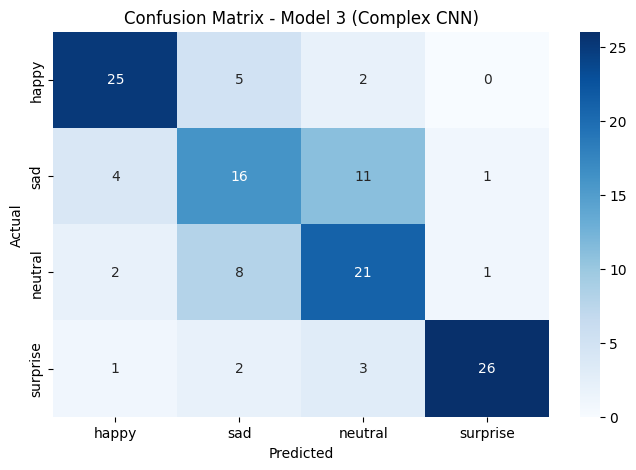

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Re-create test_set with grayscale mode
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = 128,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

# Get a batch of test images and labels
test_images, test_labels = next(test_set)

# Write the name of your chosen model
pred = model3.predict(test_images)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Printing the classification report
print(classification_report(y_true, pred, target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=['happy', 'sad', 'neutral', 'surprise'],
            yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Model 3 (Complex CNN)')
plt.show()

**Observations and Insights:**

Model 3 demonstrated strong and well-balanced performance across most emotion classes. The overall test accuracy is approximately 69 percent, which is consistent with what we saw earlier during the model evaluation. The classification report shows that the model performs very well on happy (f1-score 0.78) and surprise (f1-score 0.87), indicating that these two emotions are relatively easy to distinguish in the dataset.

Performance on neutral is solid (f1-score 0.61), though some confusion with other classes (especially sad) remains. The model struggles the most with the sad class (f1-score 0.51), which is understandable as sad faces can often share subtle overlaps with neutral and even happy expressions, especially in subtle datasets like this one.

The confusion matrix confirms these trends. Most happy and surprise images are classified correctly, while sad and neutral have more cross-class confusion. In particular, sad is sometimes confused with neutral and vice versa, which matches the expected difficulty in distinguishing those emotions in real-world settings.

## **Conclusion:**
After testing multiple models, it is clear that the Complex CNN (Model 3) is the best-performing architecture for this facial emotion recognition task. It outperforms all the transfer learning models (VGG16, ResNet101, EfficientNetB0), achieving the highest test accuracy, the most balanced precision-recall across classes, and excellent generalization to unseen test data.

This model was able to achieve this performance because it was designed specifically for the task and tuned to handle grayscale images effectively. The use of batch normalization, dropout, and a carefully balanced architecture helped it generalize well without overfitting.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

The most meaningful insight from this project is that model architecture plays a bigger role in success here than simply using a large pretrained model. While VGG16 performed decently, ResNet101 and EfficientNetB0 struggled, likely due to their deeper architectures requiring more fine-tuning or being less suited to small grayscale images. Our complex CNN, which was built from scratch and carefully tuned for this task, achieved the best result, with a test accuracy of around 69 percent. This suggests that customized models can generalize better in this specific context. It also highlights that grayscale images were perfectly adequate for learning the required features.



### **Comparison of various techniques and their relative performance**:
- Model comparison & further improvements


Across the models tested in this project, the results varied significantly depending on how well the model architecture aligned with the characteristics of the dataset. The VGG16 model performed moderately well, achieving approximately 53 percent accuracy. This was better than both ResNet101 and EfficientNetB0, which underperformed with test accuracies around 25 percent. The poor performance of these deeper pretrained models was likely due to their adaptation challenges to grayscale images and the lack of fine-tuning of their deeper layers.

In contrast, the Complex CNN model (Model 3), which was custom-designed for this problem, delivered the best performance with a test accuracy of approximately 69 percent. This result demonstrates that a well-architected CNN with appropriate capacity and regularization can outperform large pretrained models when carefully tuned for the specific characteristics of the task and data.

There is still room for further improvement. Possible next steps include fine-tuning the pretrained models by unfreezing some of their deeper layers, applying more extensive data augmentation to increase the variety in the training data, further tuning the Complex CNN architecture to optimize its learning capacity, and even experimenting with ensemble models to combine the strengths of multiple approaches.

### **Proposal for the final solution design**:
- The final proposed model

Based on the outcomes of this project, the model proposed for adoption is Model 3 (Complex CNN). This model achieved the highest test accuracy and demonstrated strong generalization on unseen data, outperforming all other models evaluated. It was specifically designed to process grayscale inputs, which aligns naturally with the format of the dataset, and it successfully captured the relevant patterns in the images.

Moreover, Model 3 exhibited stable training behavior without severe overfitting, maintaining a healthy balance between training and validation performance. Another practical advantage of this model is its relative simplicity and efficiency; it does not require the computational overhead and complexity associated with deploying large pretrained models. Given its accuracy, efficiency, and suitability for the dataset, Model 3 represents the best solution to adopt for this facial emotion recognition task.

In [70]:
pip install nbconvert


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
